In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

In [6]:
df = pd.read_csv('happy.csv')

In [7]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [8]:
df.columns = ['country', 'ladder', 'ladder_sd', 'positive_affect', 'negative_affect', 'social_support', 'freedom', 'corruption', 'generosity', 'gdp_per_capita', 'healthy_life_expectancy']

In [9]:
df.head(5)

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_per_capita,healthy_life_expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
country                    156 non-null object
ladder                     156 non-null int64
ladder_sd                  156 non-null int64
positive_affect            155 non-null float64
negative_affect            155 non-null float64
social_support             155 non-null float64
freedom                    155 non-null float64
corruption                 148 non-null float64
generosity                 155 non-null float64
gdp_per_capita             152 non-null float64
healthy_life_expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


## Adding a continent column

In [12]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                 "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                 "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                 "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                 "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                 "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                 "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                 "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                 "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                 "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                 "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                 "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                 "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                 "Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
                 "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                 "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                 "Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
                 "Colombia", "Ecuador", "Bolivia", "Peru",
                 "Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia, 'Asia')
d_europe = dict.fromkeys(europe, 'Europe')
d_north_america = dict.fromkeys(north_america, 'North America')
d_south_america = dict.fromkeys(south_america, 'South America')
d_australia = dict.fromkeys(australia, 'Australia')
continent_dict = {**d_asia, **d_europe, **d_north_america, **d_south_america, **d_australia}
df["continent"] = df["country"].map(continent_dict)
df.continent.fillna("Africa", inplace=True)

In [13]:
df.head()

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_per_capita,healthy_life_expectancy,continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Europe


In [14]:
df.loc[df['country'] == 'Uzbekistan', 'freedom'] = np.nan

In [15]:
df[df.isnull().any(axis=1)]

,country,ladder,ladder_sd,positive_affect,negative_affect,social_support,freedom,corruption,generosity,gdp_per_capita,healthy_life_expectancy,continent
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0,Asia
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN,Africa
27,Saudi Arabia,28,93,49.0,82.0,62.0,68.0,NaN,82.0,11.0,74.0,Asia
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0,Asia
36,Bahrain,37,83,39.0,83.0,59.0,24.0,NaN,23.0,20.0,42.0,Asia
40,Uzbekistan,41,99,19.0,15.0,11.0,NaN,18.0,29.0,104.0,83.0,Asia
45,Kosovo,46,107,71.0,7.0,85.0,50.0,144.0,31.0,88.0,NaN,Europe
50,Kuwait,51,98,89.0,97.0,69.0,47.0,NaN,42.0,5.0,70.0,Asia
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN,Africa
75,Hong Kong,76,33,105.0,28.0,76.0,66.0,14.0,18.0,9.0,NaN,Africa


## Life expectancy accross the globe

In [21]:
data = dict(type = 'choropleth', 
           locations = df['country'],
           locationmode = 'country names',
           z = df['ladder'], 
           text = df['country'],
           colorbar = {'title':'Ladder'},
           colorscale = "Blues")
layout = dict(title = 'Life satisfaction ladder 2019', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)

In [23]:
p = sns.color_palette(["mediumseagreen", "sandybrown", "royalblue", "orangered", "saddlebrown", "darkorchid"])

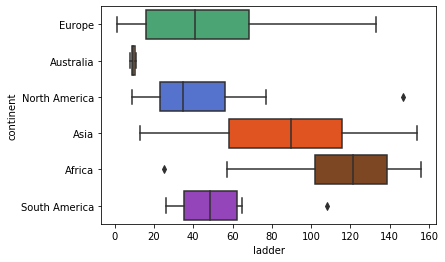

In [24]:
sns.boxplot(x="ladder", y="continent", data=df, palette=p)